In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image
from numpy import linalg
from sklearn.mixture import GaussianMixture

In [3]:
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])

In [4]:
def get_disparity_matrix(left_image, right_image):
    lengthL, widthL, heightL = left_image.shape
    lengthR, widthR, heightR = right_image.shape

    window_size = 40
    disparity_matrix = np.zeros((left_image.shape[0], left_image.shape[1] - window_size))
    for i in range(lengthR):
        for j in range(widthR - window_size):
            temp = []
            for k in range(j, j + window_size):
                temp.append(np.linalg.norm(right_image[i][j] - left_image[i][k]))
            disparity_matrix[i][j] = np.min(temp)
    return disparity_matrix

In [5]:
def plot_results(X, Y, means, covariances, index, title):
    splot = plt.subplot(5, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y == i):
            continue
        plt.scatter(X[Y == i, 0], X[Y == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-6., 4. * np.pi - 6.)
    plt.ylim(-5., 5.)
    plt.title(title)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [6]:
im0 = Image.open('im0.ppm')
im8 = Image.open('im8.ppm')
left_image = np.asarray(im0, dtype="int32")
right_image = np.asarray(im8, dtype="int32")

In [7]:
disparity_matrix = get_disparity_matrix(left_image, right_image)

In [46]:
gmm = GaussianMixture(n_components=381, covariance_type='full', max_iter=100).fit(disparity_matrix)

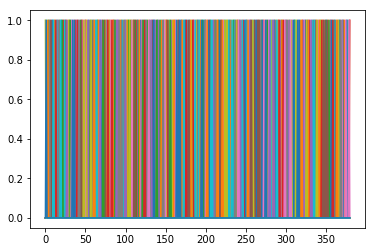

In [47]:
probs = gmm.predict_proba(disparity_matrix)
plt.plot(probs)

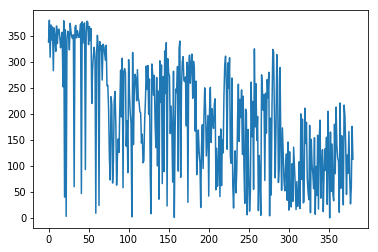

In [48]:
pred = gmm.predict(disparity_matrix)
plt.plot(pred)

In [49]:
means = gmm.means_

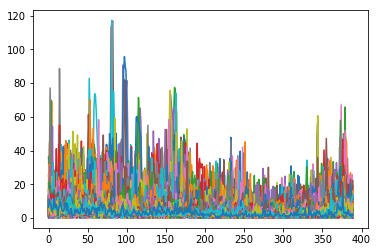

In [50]:
plt.plot(means.T)

In [ ]:
import seabo